In [32]:
import numpy as np
import pandas as pd

# models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# data manipulation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# misc
import math

In [6]:
wine_dataset = np.load("../data/wine_dataset.npy")

In [7]:
wine_dataset.shape

(1143, 12)

In [24]:
def training(model_name):
    test_sizes = [0.8, 0.5, 0.2]
    # test_sizes = [0.2] # for sanity checking process
    splits = {}
    for size in test_sizes:

        # getting the new split
        X_train, X_test, y_train, y_test = train_test_split(
            wine_dataset[:, 0:-1], wine_dataset[:, -1], 
            test_size=size, random_state=1
        )

        param_grid = None

        # define model
        if model_name == "LogisticRegression":
            model = LogisticRegression()
            param_grid = {
                'C': np.linspace(0.001, 0.999, 10)
            }
        elif model_name == "XGBClassifier":
            model = XGBClassifier()
        elif model_name == "RandomForestClassifier":
            model = RandomForestClassifier()
        else:
            model = DecisionTreeClassifier()

        # parameters to hypertune
        if param_grid == None:
            param_grid = {
                'max_depth': [i for i in range(1, 12)]
            }

        # cross validation to search for the best model hyperparameters
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=True, error_score='raise')
        grid_search.fit(X_train, y_train)
        splits[size] = grid_search
    return splits

In [46]:
def draw_heatmap(errors, C_list, title):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(errors.reshape(-1, 1), annot=True, fmt='.3f', yticklabels=C_list.reshape(-1, 1), xticklabels=[])
    ax.collections[0].colorbar.set_label('error')
    ax.set(ylabel='Hyperparameter')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title(title)
    plt.show()

In [33]:
def results(splits):
    for size, grid_search in splits.items():
        print(f"{math.ceil(100 * (1-size))}/{math.ceil(100 * size)} Partition:")
        print(f"The best parameter(s) are {grid_search.best_params_}")
        print(f"The best cross validation accuracy is {grid_search.best_score_}")
        
        X_train, X_test, y_train, y_test = train_test_split(
            wine_dataset[:, 0:-1], wine_dataset[:, -1], 
            test_size=size, random_state=1
        )
        
        print(f"The final testing accuracy is {accuracy_score(y_test, grid_search.best_estimator_.fit(X_train, y_train).predict(X_test))}")
        print("===")

In [43]:
def draw_heatmaps(splits, depth=True):
    test_sizes = [0.8, 0.5, 0.2]
    if not depth:
        for size in test_sizes:
            draw_heatmap(splits[size].cv_results_['mean_test_score'], splits[size].cv_results_['param_C'].data, f'{math.ceil(100 * (1-size))}/{math.ceil(100 * size)}')
    else:
        for size in test_sizes:
            draw_heatmap(splits[size].cv_results_['mean_test_score'], splits[size].cv_results_['param_max_depth'].data, f'{math.ceil(100 * (1-size))}/{math.ceil(100 * size)}')


Logistic Regression

In [34]:
splits = training("LogisticRegression")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [36]:
test_sizes = [0.8, 0.5, 0.2]

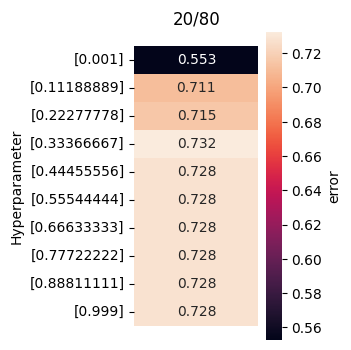

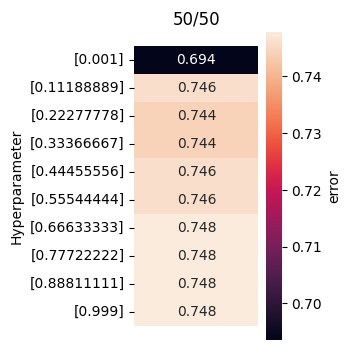

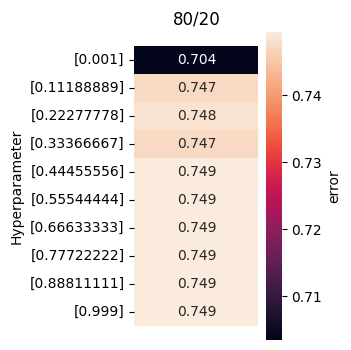

In [38]:
for size in test_sizes:
    draw_heatmap(splits[size].cv_results_['mean_test_score'], splits[size].cv_results_['param_C'].data, f'{math.ceil(100 * (1-size))}/{math.ceil(100 * size)}')

In [35]:
results(splits)

20/80 Partition:
The best parameter(s) are {'C': 0.33366666666666667}
The best cross validation accuracy is 0.7323671497584542
The final testing accuracy is 0.746448087431694
===
50/50 Partition:
The best parameter(s) are {'C': 0.6663333333333333}
The best cross validation accuracy is 0.7478260869565216
The final testing accuracy is 0.7517482517482518
===
80/20 Partition:
The best parameter(s) are {'C': 0.44455555555555554}
The best cross validation accuracy is 0.7494745691467003
The final testing accuracy is 0.7641921397379913
===


In [39]:
splits = training("XGBClassifier")

Fitting 5 folds for each of 11 candidates, totalling 55 fits
Fitting 5 folds for each of 11 candidates, totalling 55 fits
Fitting 5 folds for each of 11 candidates, totalling 55 fits


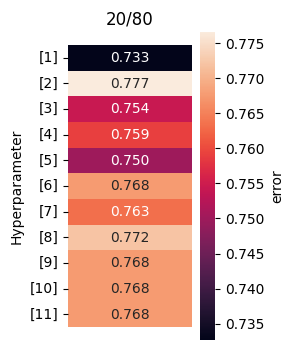

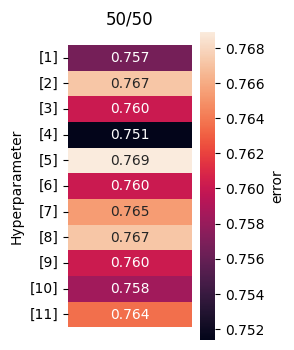

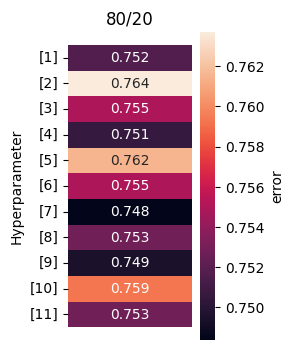

In [47]:
draw_heatmaps(splits)

In [48]:
results(splits)

20/80 Partition:
The best parameter(s) are {'max_depth': 2}
The best cross validation accuracy is 0.7766183574879226
The final testing accuracy is 0.7147540983606557
===
50/50 Partition:
The best parameter(s) are {'max_depth': 5}
The best cross validation accuracy is 0.7689092295957286
The final testing accuracy is 0.7517482517482518
===
80/20 Partition:
The best parameter(s) are {'max_depth': 2}
The best cross validation accuracy is 0.7637002341920375
The final testing accuracy is 0.7641921397379913
===


In [49]:
splits = training("RandomForestClassifier")

Fitting 5 folds for each of 11 candidates, totalling 55 fits
Fitting 5 folds for each of 11 candidates, totalling 55 fits
Fitting 5 folds for each of 11 candidates, totalling 55 fits


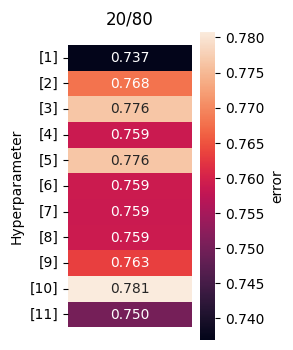

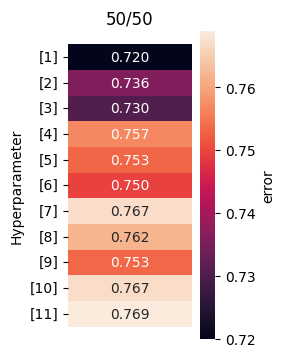

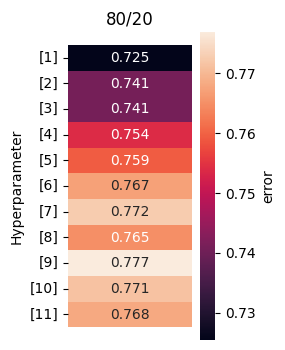

In [50]:
draw_heatmaps(splits)

In [51]:
results(splits)

20/80 Partition:
The best parameter(s) are {'max_depth': 10}
The best cross validation accuracy is 0.7807729468599034
The final testing accuracy is 0.7278688524590164
===
50/50 Partition:
The best parameter(s) are {'max_depth': 11}
The best cross validation accuracy is 0.7688787185354691
The final testing accuracy is 0.7762237762237763
===
80/20 Partition:
The best parameter(s) are {'max_depth': 9}
The best cross validation accuracy is 0.7768269981384736
The final testing accuracy is 0.7947598253275109
===


In [52]:
splits = training("DecisionTreeClassifier")

Fitting 5 folds for each of 11 candidates, totalling 55 fits
Fitting 5 folds for each of 11 candidates, totalling 55 fits
Fitting 5 folds for each of 11 candidates, totalling 55 fits


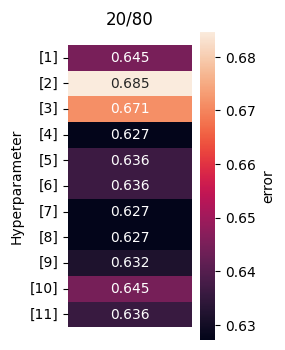

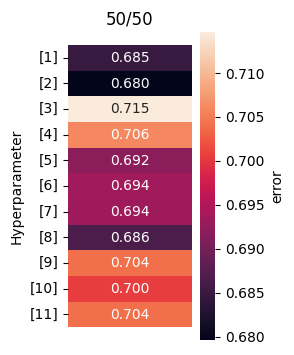

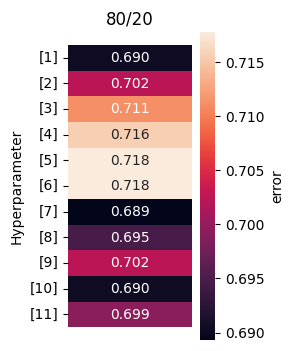

In [53]:
draw_heatmaps(splits)

In [54]:
results(splits)

20/80 Partition:
The best parameter(s) are {'max_depth': 2}
The best cross validation accuracy is 0.6846376811594203
The final testing accuracy is 0.6961748633879782
===
50/50 Partition:
The best parameter(s) are {'max_depth': 3}
The best cross validation accuracy is 0.7146300533943555
The final testing accuracy is 0.7325174825174825
===
80/20 Partition:
The best parameter(s) are {'max_depth': 5}
The best cross validation accuracy is 0.7177865849996997
The final testing accuracy is 0.759825327510917
===
